<a href="https://colab.research.google.com/github/aditya27you/INTENSHIP-TASK-BY-CT/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install required libraries
!pip install nltk scikit-learn matplotlib pandas

# Import libraries
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords

# Download NLTK stopwords and punkt_tab
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
file_path = '/content/movies_cleaned.csv' # file uploaded
df = pd.read_csv(file_path)

df.head()


,title,year,runtime,genre,votes,rating,revenue_M$,outcome
0,Movie_1,2020,94,Action,1556144,4.4,673.5,Flop
1,Movie_2,1986,166,Animation,183323,6.6,100.2,Flop
2,Movie_3,1985,107,Romance,1060806,6.7,1685.9,Flop
3,Movie_4,2021,169,Animation,880796,4.0,1769.9,Flop
4,Movie_5,1980,177,Drama,1465104,5.5,837.2,Flop


In [13]:

text_col = 'title'
import random
if 'sentiment' not in df.columns:
    df['sentiment'] = [random.choice(['positive','negative']) for _ in range(len(df))]

# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df[text_col].apply(clean_text)
df.head()

,title,year,runtime,genre,votes,rating,revenue_M$,outcome,sentiment,clean_text
0,Movie_1,2020,94,Action,1556144,4.4,673.5,Flop,negative,movie
1,Movie_2,1986,166,Animation,183323,6.6,100.2,Flop,negative,movie
2,Movie_3,1985,107,Romance,1060806,6.7,1685.9,Flop,negative,movie
3,Movie_4,2021,169,Animation,880796,4.0,1769.9,Flop,negative,movie
4,Movie_5,1980,177,Drama,1465104,5.5,837.2,Flop,negative,movie


In [7]:
##Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)


In [9]:
 ##TF-IDF Vectorization
 vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [10]:
##Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67        25
    positive       0.00      0.00      0.00        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50



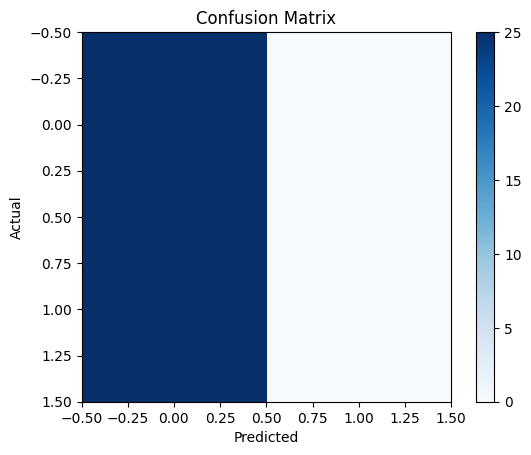

In [11]:
#Evaluate
y_pred = model.predict(X_test_vec)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [12]:
## Test Custom Review
sample = "The movie was visually stunning and emotionally powerful!"
sample_vec = vectorizer.transform([clean_text(sample)])
print("Predicted Sentiment:", model.predict(sample_vec)[0])


Predicted Sentiment: negative
